In [34]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [35]:
db = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [36]:
a = db.cursor().execute('SELECT name from sqlite_master where type="table"')
a.fetchall()

[('pageviews',),
 ('checker',),
 ('deadlines',),
 ('datamart',),
 ('test',),
 ('control',)]

In [37]:
query = """SELECT uid, COUNT(*) AS num_comits FROM checker
        WHERE uid LIKE 'user_%' AND labname <> 'project1'
        GROUP BY uid"""
commits = pd.read_sql(query,db)
commits

,uid,num_comits
0,user_0,3
1,user_1,62
2,user_10,20
3,user_11,7
4,user_12,86
5,user_13,52
6,user_14,61
7,user_15,23
8,user_16,41
9,user_17,51


In [38]:
query = """ SELECT uid, COUNT(*) AS num_views FROM pageviews WHERE uid LIKE 'user_%' GROUP BY uid
"""
num_views = pd.read_sql(query,db)
num_views

,uid,num_views
0,user_1,28
1,user_10,89
2,user_14,143
3,user_17,47
4,user_18,3
5,user_19,16
6,user_21,10
7,user_25,179
8,user_28,149
9,user_3,317


In [39]:
query="""SELECT uid, CAST((JulianDay(test.first_commit_ts) - JulianDay(DATETIME(deadlines.deadlines,'unixepoch'))) * 24 AS Integer) AS delta FROM test LEFT JOIN deadlines ON test.labname=deadlines.labs WHERE labname <> 'project1'"""
delta = pd.read_sql(query,db)


In [40]:
delta = delta.groupby(['uid']).mean()

In [41]:
pivot_table = num_views.merge(commits,on=['uid'])
pivot_table = delta.merge(pivot_table,on=['uid'])
pivot_table = pivot_table.drop(columns=['uid'])
pivot_table

,delta,num_views,num_comits
0,-64.400000,28,62
1,-74.800000,89,20
2,-159.000000,143,61
3,-61.600000,47,51
4,-5.666667,3,5
5,-98.750000,16,118
6,-95.500000,10,65
7,-92.600000,179,79
8,-86.400000,149,60
9,-105.400000,317,18


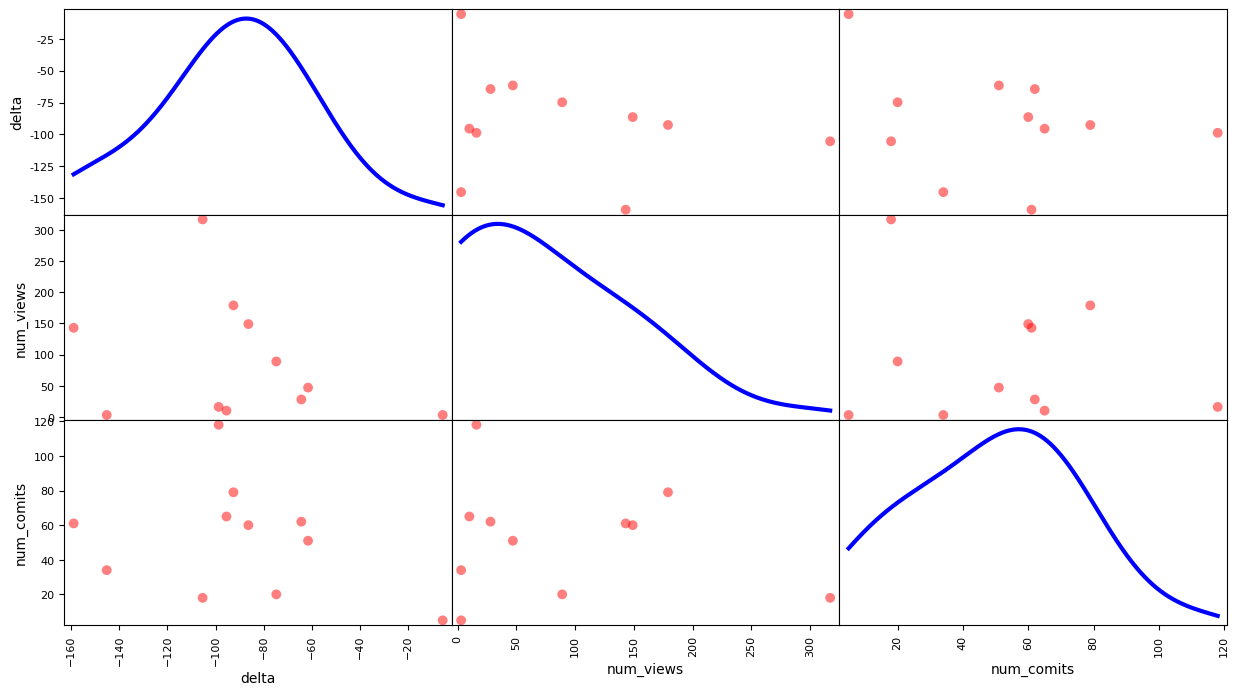

In [42]:
ax = scatter_matrix(pivot_table, figsize=(15,8), diagonal='kde', density_kwds=dict(color='blue',linewidth=3), s=200, color='red')

In [43]:
db.close()

Can we say that if a user has a low number of pageviews then they likely have a low number of commits? 

no  

Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline? 

no  

Can we say that there are many users with a low number of commits and a few with a high number of commits?  

yes

Can we say that there are many users with a small average difference and a few with a large average difference?  

no